In [1]:
`#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
fontprop =fm.FontProperties(fname="fonts/malgun.ttf")

In [2]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [3]:
import concurrent.futures
import FinanceDataReader as fdr
import math
import pandas as pd
import pymysql, calendar, time, json
import requests
from tqdm import tqdm

from bs4 import BeautifulSoup
from datetime import datetime
from dateutil.relativedelta import relativedelta
from threading import Timer

In [4]:
import time
from datetime import date
today = date.today()

def get_daily_price(code, start_date, end_date=today.strftime('%Y-%m-%d')):
    df = fdr.DataReader(code, start_date, end_date)
    return df

In [13]:
stocks = ['GOOGL', 'MSFT', 'TSLA', 'NVDA', 'AMZN', 'FB', 'NFLX', 'AAPL', 'ZM', 'CRNC', 'COIN', 'PLTR']
df = pd.DataFrame()
for s in stocks:
    df[s] = get_daily_price(s, '2018-05-04')['Close']

In [119]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

print(start_date.strftime('%Y-%m-%d'))
print(end_date.strftime('%Y-%m-%d'))

2020-07-09
2021-07-08


In [61]:
%%writefile ts/ch06_01_EfficientFrontier.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

stocks = ['GOOGL', 'MSFT', 'TSLA', 'NVDA', 'AMZN', 'FB', 'NFLX', 'AAPL', 'ZM', 'CRNC', 'COIN', 'PLTR']
df = pd.DataFrame()
for s in stocks:
    df[s] = get_daily_price(s)['Close']
    
# mk = Analyzer.MarketDB()
# stocks = ['삼성전자', 'SK하이닉스', 'LG화학', 'NAVER', '현대자동차', '삼성SDI' , '셀트리온', '카카오', '기아', '현대모비스']
# # stocks = ['GOOGL', 'MSFT', 'TSLA', 'NVDA', 'AMZN', 'FB', 'NFLX', 'APPL', 'MRDA', 'CRNC', 'RE', 'PLTR']
# df = pd.DataFrame()
# for s in stocks:
#     df[s] = mk.get_daily_price(s, '2018-05-04', '2021-07-05')['close']
  
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]] 

df.plot.scatter(x='Risk', y='Returns', figsize=(20, 16), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

Overwriting ts/ch06_01_EfficientFrontier.py


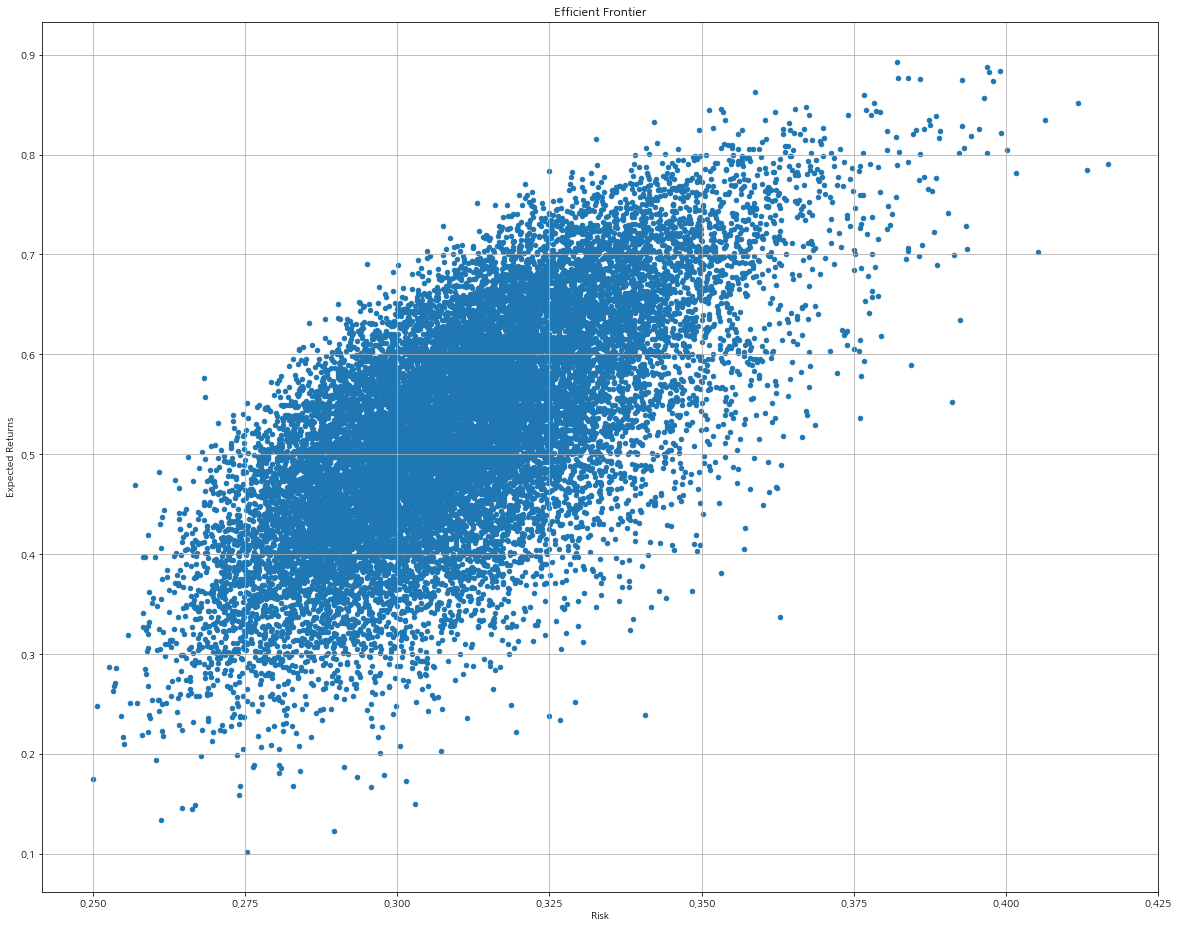

In [62]:
%run ts/ch06_01_EfficientFrontier.py

In [70]:
%%writefile ts/ch06_02_PortfolioOptimization.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

stocks = ['GOOGL', 'MSFT', 'TSLA', 'NVDA', 'AMZN', 'FB', 'NFLX', 'AAPL', 'ZM', 'CRNC', 'COIN', 'PLTR']
df = pd.DataFrame()
for s in stocks:
    df[s] = get_daily_price(s)['Close']
    
# mk = Analyzer.MarketDB()
# stocks = ['삼성전자', 'SK하이닉스', 'LG화학', 'NAVER', '현대자동차', '삼성SDI' , '셀트리온', '카카오', '기아', '현대모비스']
# # stocks = ['GOOGL', 'MSFT', 'TSLA', 'NVDA', 'AMZN', 'FB', 'NFLX', 'APPL', 'MRDA', 'CRNC', 'RE', 'PLTR']
# df = pd.DataFrame()
# for s in stocks:
#     df[s] = mk.get_daily_price(s, '2018-05-04', '2021-07-05')['close']
  
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)  # ①

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  # ② 

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # ③
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # ④

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(20,16), grid=True)  # ⑤
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)  # ⑥
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)  # ⑦
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

print('max_sharpe : \n', max_sharpe)
print('\n\n min_risk : \n', min_risk)

Overwriting ts/ch06_02_PortfolioOptimization.py


### 별표는 샤프지수가 가장 큰 포트폴리오 - 샤프지수가 높을 수록 위험에 대한 보상이 크다
### 엑스(X)표는 가장 리스크가 적은 포트폴리오

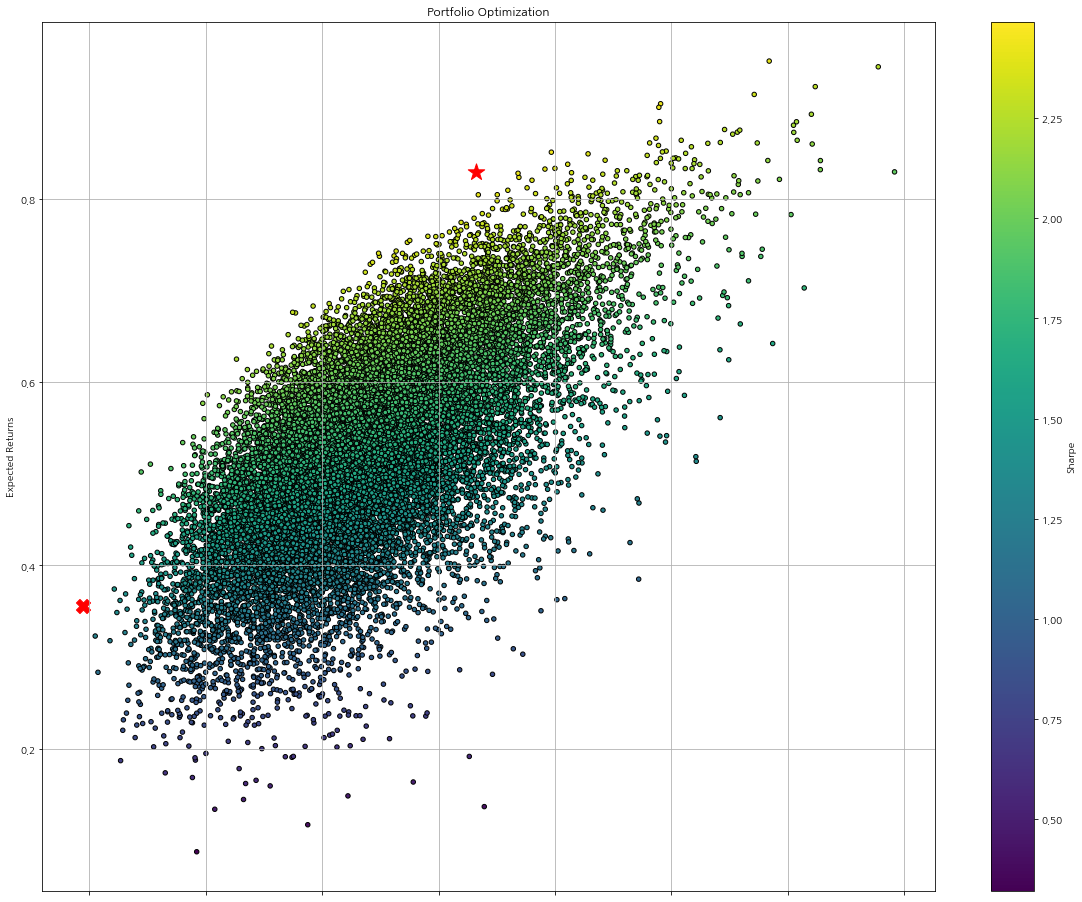

max_sharpe : 
         Returns      Risk    Sharpe     GOOGL     MSFT      TSLA     NVDA  \
14192  0.829577  0.333038  2.490934  0.187901  0.02441  0.110181  0.11145   

         AMZN        FB      NFLX      AAPL        ZM      CRNC      COIN  \
14192  0.0294  0.151657  0.047978  0.021558  0.001571  0.188884  0.002751   

           PLTR  
14192  0.122258  
min_risk : 
        Returns      Risk    Sharpe     GOOGL      MSFT      TSLA     NVDA  \
2272  0.355759  0.248625  1.430904  0.189376  0.174973  0.001273  0.00355   

         AMZN        FB      NFLX      AAPL        ZM      CRNC      COIN  \
2272  0.06804  0.132695  0.090665  0.093579  0.042235  0.044494  0.099984   

          PLTR  
2272  0.059135  


In [69]:
%run ts/ch06_02_PortfolioOptimization.py

In [30]:
%%writefile ts/ch06_03_BollingerBand.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'GOOGL'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})
  
df['MA20'] = df['close'].rolling(window=20).mean()  # ①
df['stddev'] = df['close'].rolling(window=20).std() # ②
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④
df = df[19:]  # ⑤

plt.figure(figsize=(20, 16))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title(f'{code} Bollinger Band (20 day, 2 std)')
plt.show()


Overwriting ts/ch06_03_BollingerBand.py


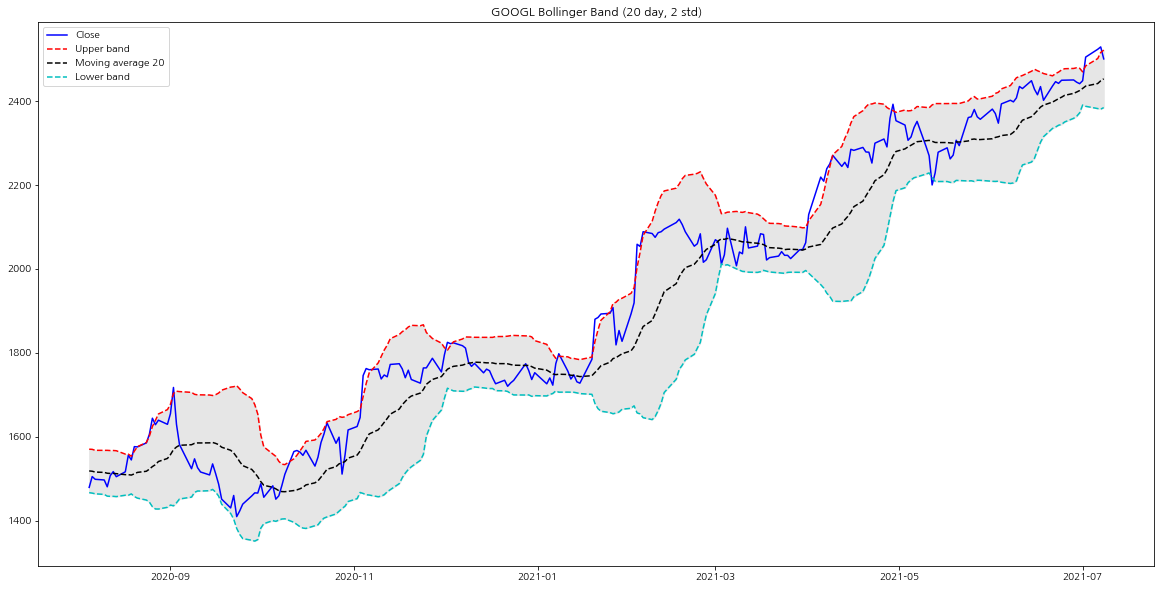

In [12]:
%run ts/ch06_03_BollingerBand.py

In [71]:
%%writefile ts/ch06_04_BollingerBand_PercentB.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TLSA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  # ①
df = df[19:]

plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title(f'{code} Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()


Overwriting ts/ch06_04_BollingerBand_PercentB.py


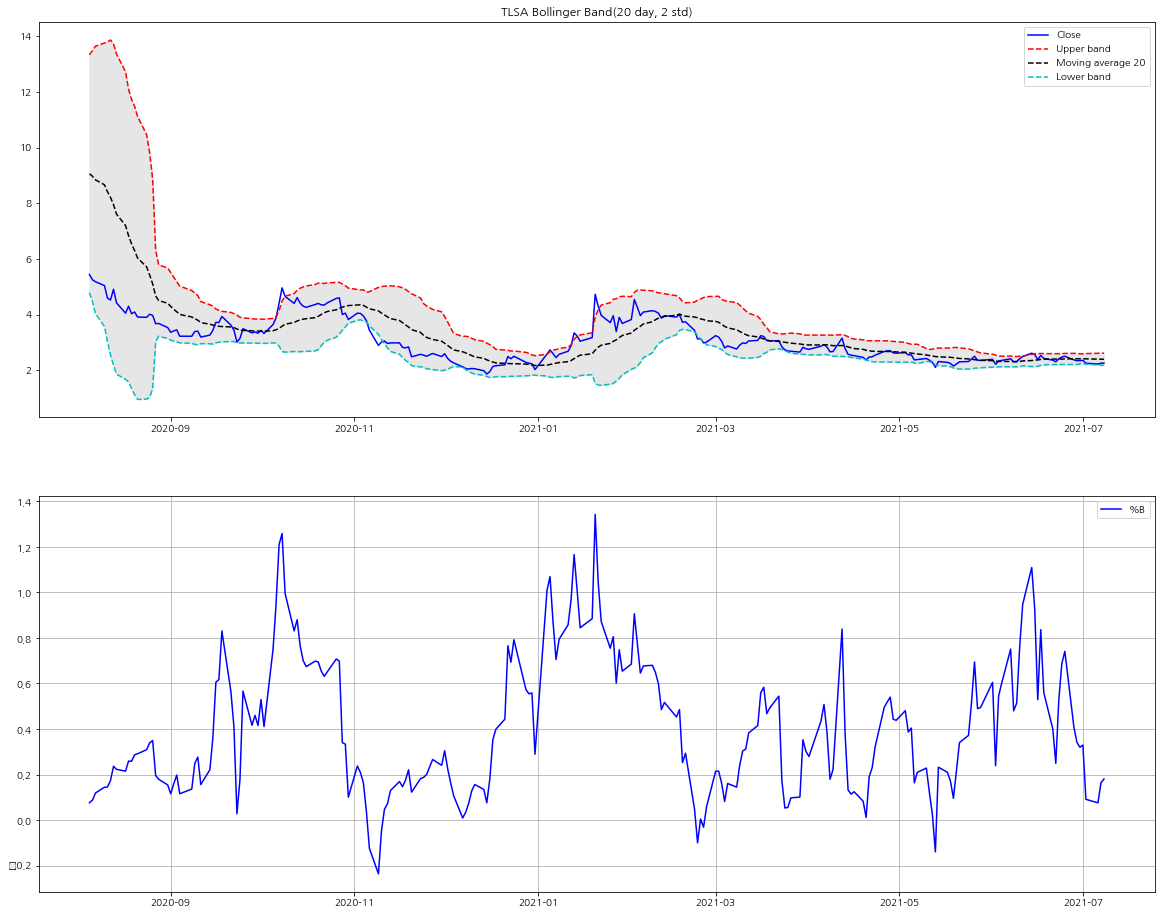

In [72]:
%run ts/ch06_04_BollingerBand_PercentB.py

In [73]:
%%writefile ts/ch06_05_BollingerBand_BandWidth.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
today = date.today()
from dateutil.relativedelta import relativedelta
now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TLSA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')


df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # ①
df = df[19:]

plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title(f'{code} Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()

Overwriting ts/ch06_05_BollingerBand_BandWidth.py


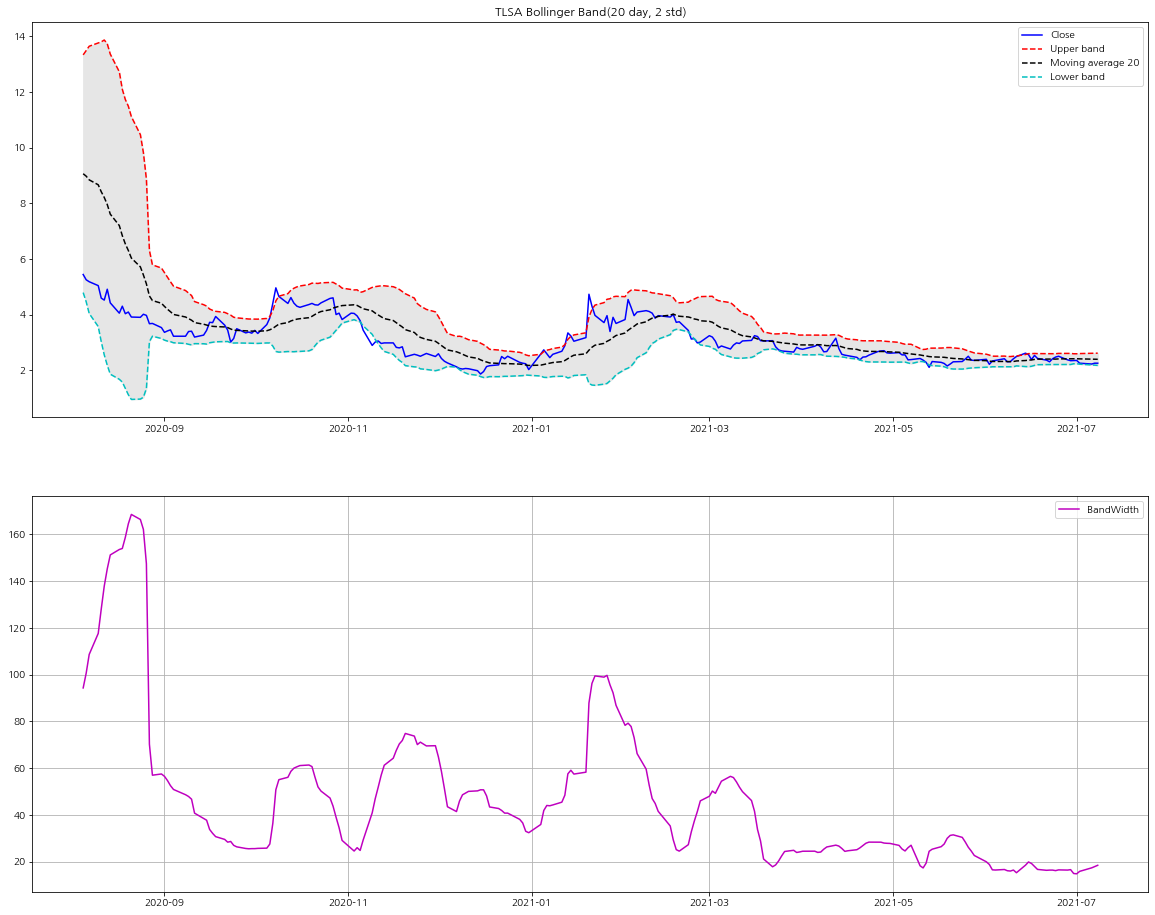

In [74]:
%run ts/ch06_05_BollingerBand_BandWidth.py

In [77]:
%%writefile ts/ch06_06_BollingerBand_TrendFollowing.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TLSA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:]

plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();   


Overwriting ts/ch06_06_BollingerBand_TrendFollowing.py


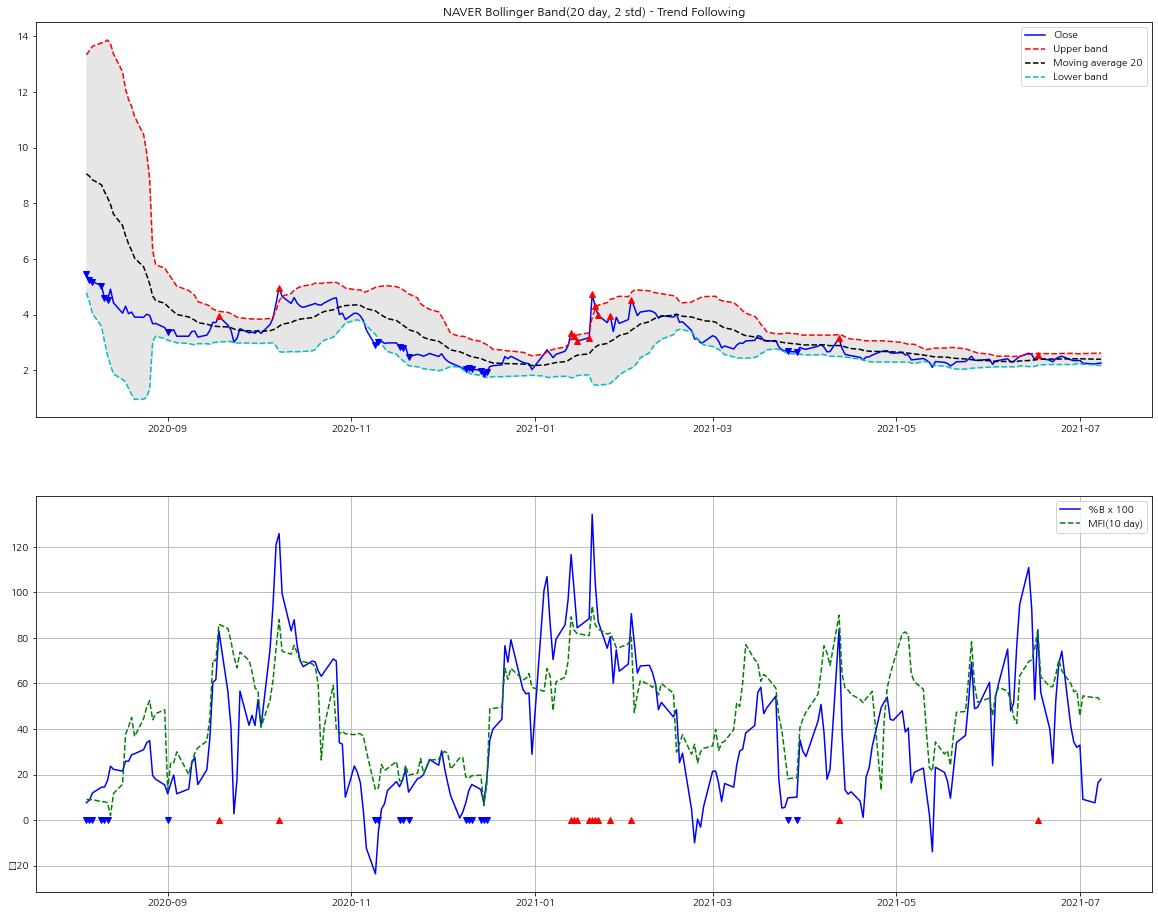

In [78]:
%run ts/ch06_06_BollingerBand_TrendFollowing.py

In [79]:
%%writefile ts/ch06_07_BollingerBand_IIP21.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TSLA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low']) / (df['high']-df['low'])*df['volume']  # ①
df['IIP21'] = df['II'].rolling(window=21).sum() / df['volume'].rolling(window=21).sum()*100  # ②
df = df.dropna()

plt.figure(figsize=(20, 16))
plt.subplot(3, 1, 1)
plt.title(f'{code} Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

Overwriting ts/ch06_07_BollingerBand_IIP21.py


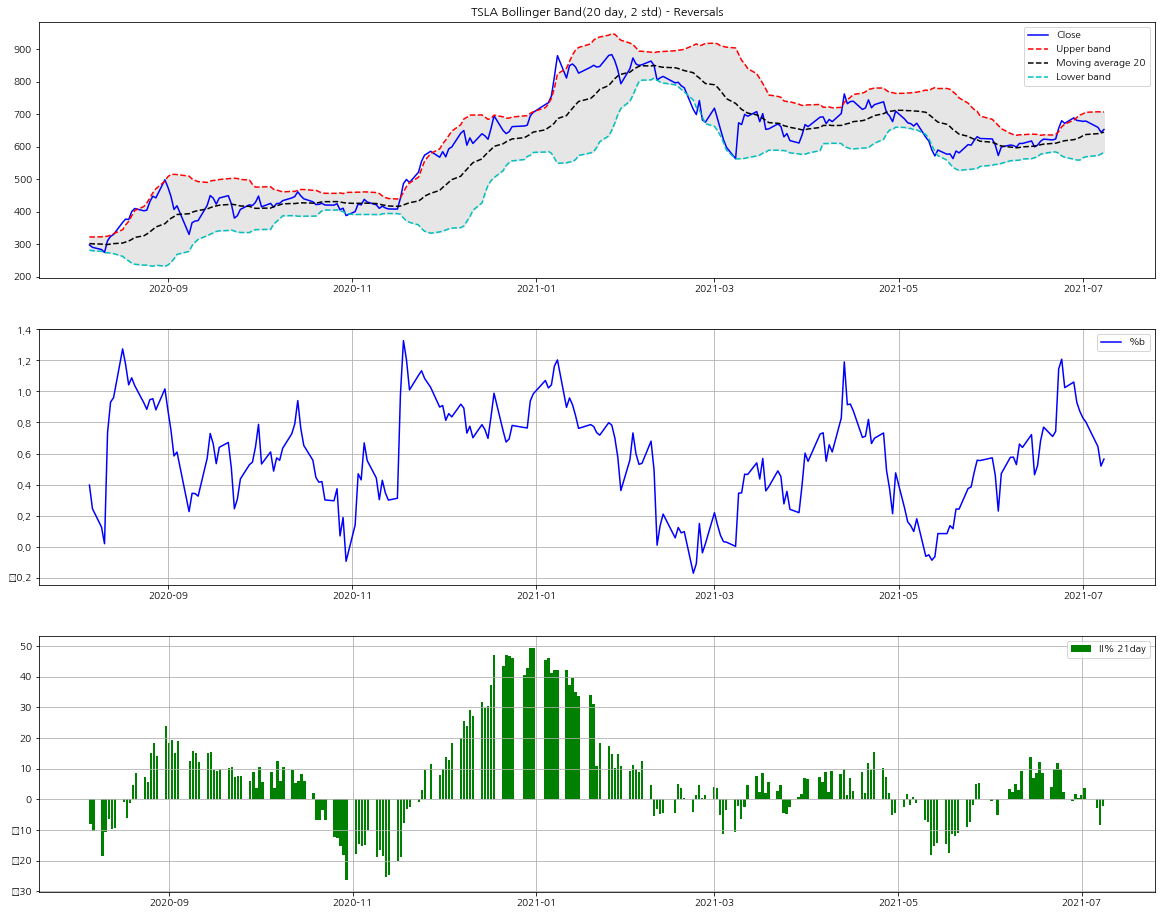

In [80]:
%run ts/ch06_07_BollingerBand_IIP21.py

In [107]:
%%writefile ts/ch06_08_BollingerBand_Reversals.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

def main(code):
    df = get_daily_price(code)
    df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

    # mk = Analyzer.MarketDB()
    # df = mk.get_daily_price('카카오', '2019-01-02')

    df['MA20'] = df['close'].rolling(window=20).mean() 
    df['stddev'] = df['close'].rolling(window=20).std() 
    df['upper'] = df['MA20'] + (df['stddev'] * 2)
    df['lower'] = df['MA20'] - (df['stddev'] * 2)
    df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

    df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
    df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
    df = df.dropna()

    plt.figure(figsize=(20, 16))
    plt.subplot(3, 1, 1)
    plt.title(f'{code} Bollinger Band(20 day, 2 std) - Reversals')
    plt.plot(df.index, df['close'], 'm', label='Close')
    plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
    plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
    plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
    plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
    for i in range(0, len(df.close)):
        if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
            plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
        elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
            plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
    plt.legend(loc='best')

    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['PB'], 'b', label='%b')
    plt.grid(True)
    plt.legend(loc='best')

    plt.subplot(3, 1, 3)
    plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
    for i in range(0, len(df.close)):
        if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
            plt.plot(df.index.values[i], 0, 'r^') # ⑤
        elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
            plt.plot(df.index.values[i], 0, 'bv') # ⑥
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    
if __name__=="__main__":
    code = # 'NFLX, AAPL, AMZN, FB, MSFT, GOOGL,  NVDA, PYPL' # 'MRNA'
    main(code)

Overwriting ts/ch06_08_BollingerBand_Reversals.py


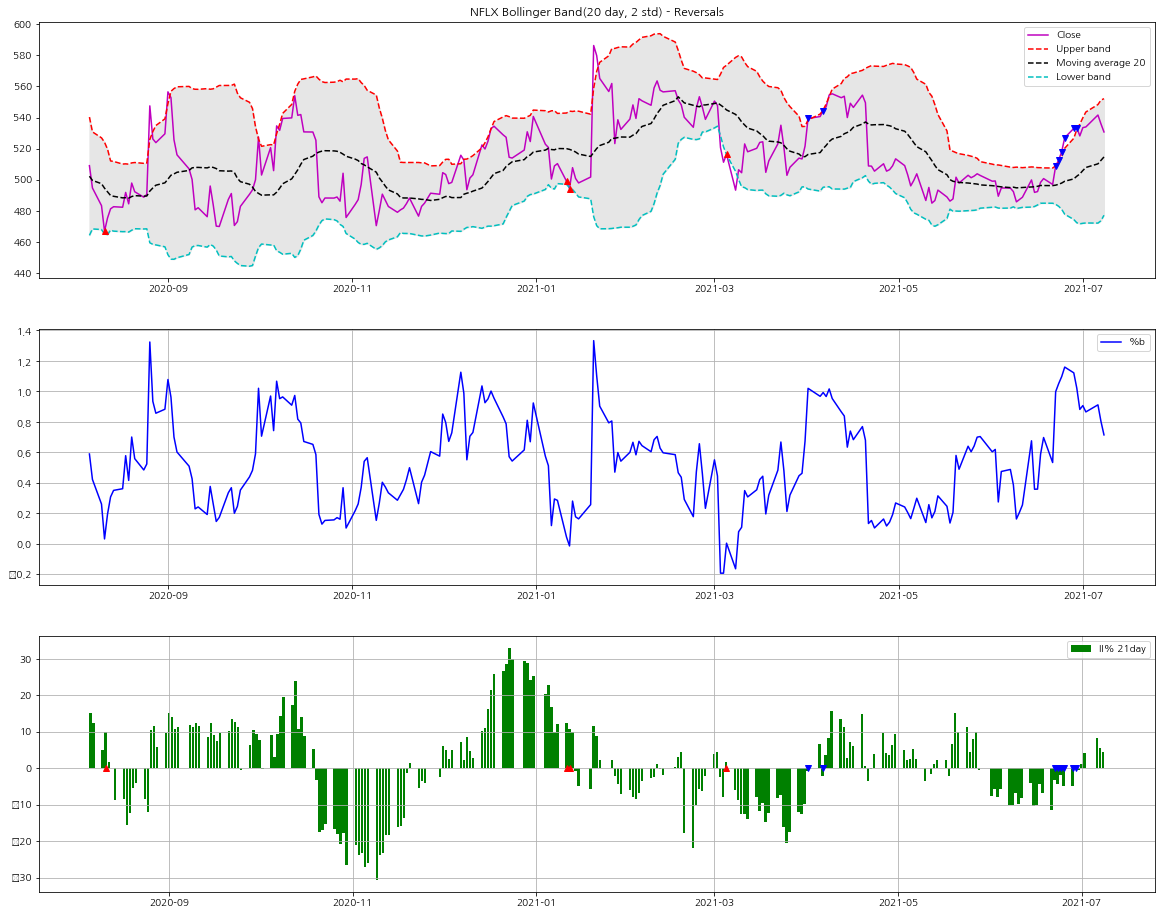

In [108]:
%run ts/ch06_08_BollingerBand_Reversals.py

In [85]:
%%writefile ts/ch06_09_FirstScreen.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TSLA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')


ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() # ② 종가의 12주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # ⑤ MACD 히스토그램

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna() 
df['number'] = df.index.map(mdates.date2num)  # ⑥
ohlc = df[['number','open','high','low','close']]

plt.figure(figsize=(20, 16))
p1 = plt.subplot(2, 1, 1)
plt.title(f'Triple Screen Trading - First Screen ({code})')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # ⑦
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

Overwriting ts/ch06_09_FirstScreen.py


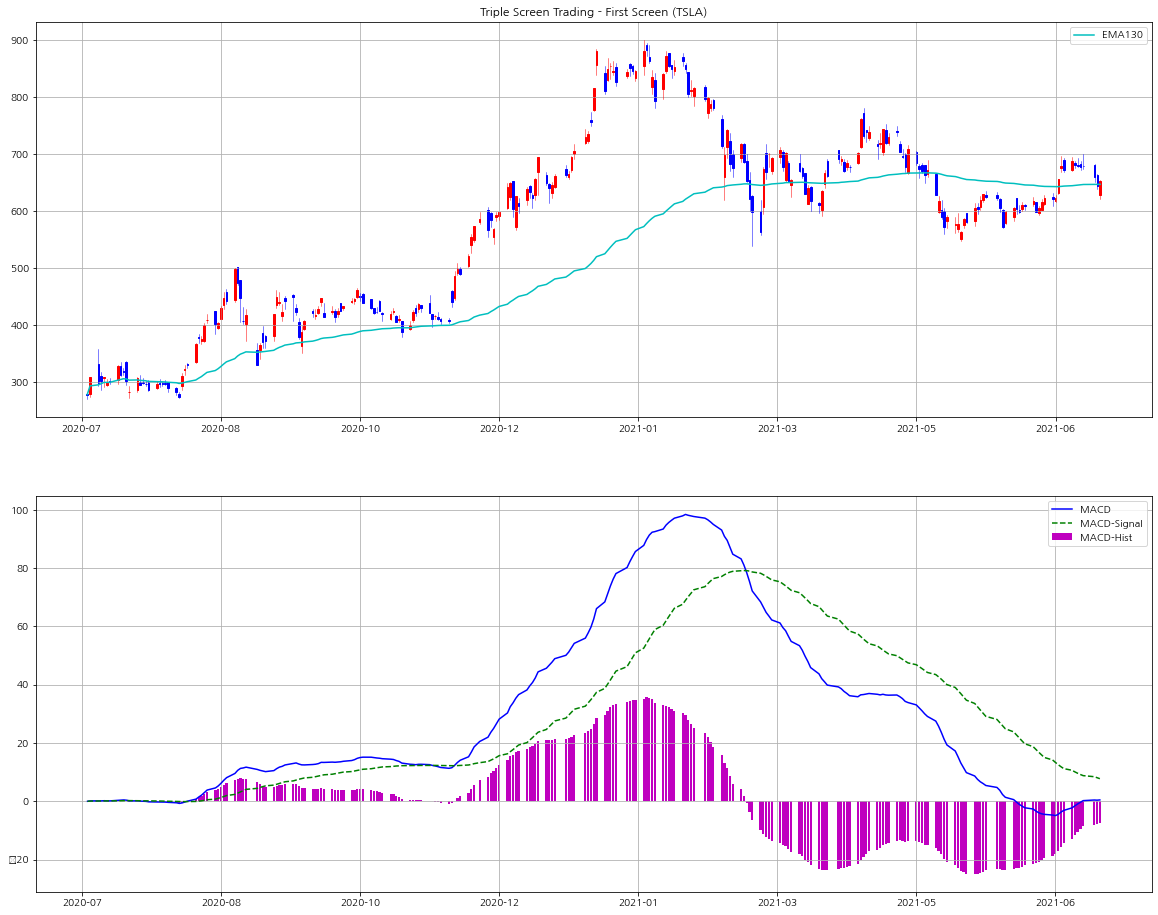

In [86]:
%run ts/ch06_09_FirstScreen.py

In [87]:
%%writefile ts/ch06_10_SecondScreen.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TSLA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean() 
macd = ema60 - ema130
signal = macd.ewm(span=45).mean() 
macdhist = macd - signal

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()      # ①
ndays_low = df.low.rolling(window=14, min_periods=1).min()        # ②
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100  # ③
slow_d= fast_k.rolling(window=3).mean()                           # ④
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             # ⑤

plt.figure(figsize=(20, 16))
p1 = plt.subplot(2, 1, 1)
plt.title(f'Triple Screen Trading - Second Screen ({code})')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')
p1 = plt.subplot(2, 1, 2)
plt.grid(True)
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100]) # ⑥
plt.legend(loc='best')
plt.show()


Overwriting ts/ch06_10_SecondScreen.py


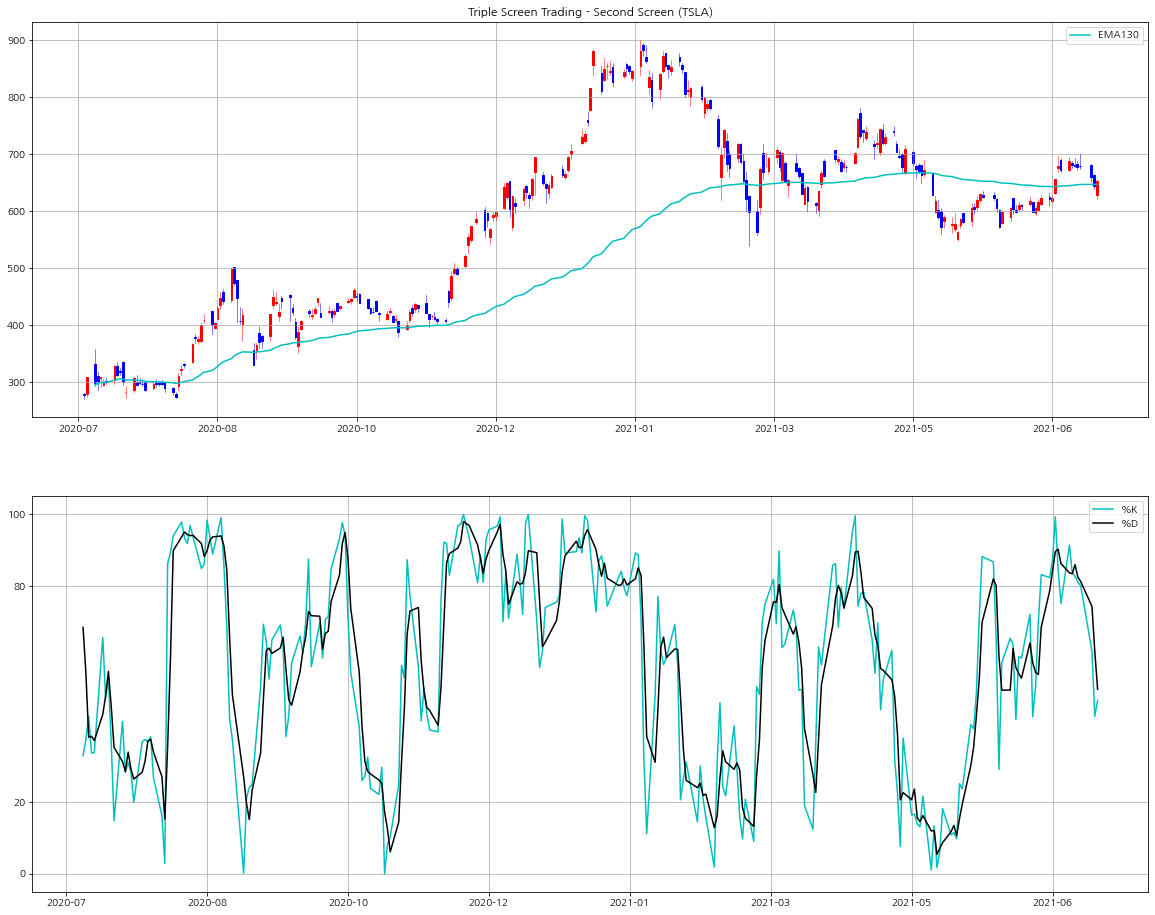

In [88]:
%run ts/ch06_10_SecondScreen.py

In [89]:
%%writefile ts/ch06_11_TripleScreen.py

import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from Investar import Analyzer
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings(action='ignore')
from mpl_finance import candlestick_ohlc
#from mplfinance.original_flavor import candlestick_ohlc

now = datetime.now()
start_date = now - relativedelta(months=12)
end_date = now - relativedelta(days=1)

def get_daily_price(code, start_date=start_date, end_date=end_date):
    df = fdr.DataReader(code, start_date, end_date) # for last 12 months
    return df

code = 'TSLA'
df = get_daily_price(code)
df = df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high', 'Low': 'low',  'Volume': 'volume', 'Change': 'change'})

# mk = Analyzer.MarketDB()
# df = mk.get_daily_price('카카오', '2019-01-02')

ema60 = df.close.ewm(span=60).mean()
ema130 = df.close.ewm(span=130).mean() 
macd = ema60 - ema130
signal = macd.ewm(span=45).mean() 
macdhist = macd - signal

df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal,
    macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]

ndays_high = df.high.rolling(window=14, min_periods=1).max()      # ①
ndays_low = df.low.rolling(window=14, min_periods=1).min()        # ②
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100  # ③
slow_d= fast_k.rolling(window=3).mean()                           # ④
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()             # ⑤

plt.figure(figsize=(20, 16))
p1 = plt.subplot(3, 1, 1)
plt.title(f'Triple Screen Trading - Second Screen ({code})')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best')

p2 = plt.subplot(3, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(3, 1, 3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0, 20, 80, 100])
plt.legend(loc='best')
plt.show()


Overwriting ts/ch06_11_TripleScreen.py


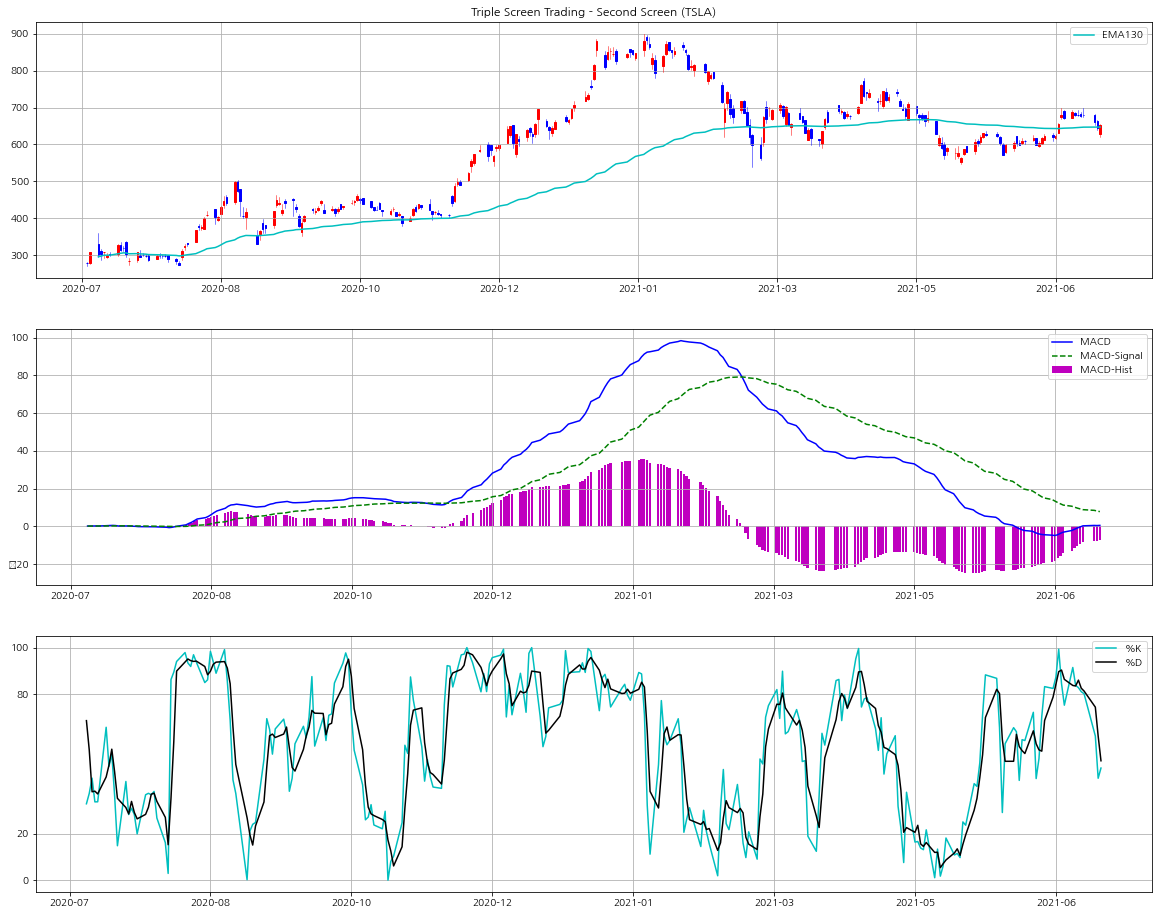

In [90]:
%run ts/ch06_11_TripleScreen.py

In [27]:
%%writefile ts/ch06_12_DualMomentum.py
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
from Investar import Analyzer

class DualMomentum:
    def __init__(self):
        """생성자: KRX 종목코드(codes)를 구하기 위한 MarkgetDB 객체 생성"""
        self.mk = Analyzer.MarketDB()
    
    def get_rltv_momentum(self, start_date, end_date, stock_count):
        """특정 기간 동안 수익률이 제일 높았던 stock_count 개의 종목들 (상대 모멘텀)
            - start_date  : 상대 모멘텀을 구할 시작일자 ('2020-01-01')   
            - end_date    : 상대 모멘텀을 구할 종료일자 ('2020-12-31')
            - stock_count : 상대 모멘텀을 구할 종목수
        """       
        connection = pymysql.connect(host='localhost', port=3306, 
            db='INVESTAR', user='root', passwd='******', autocommit=True)
        cursor = connection.cursor()
        
        # 사용자가 입력한 시작일자를 DB에서 조회되는 일자로 보정 
        sql = f"select max(date) from daily_price where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("start_date : {} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')


        # 사용자가 입력한 종료일자를 DB에서 조회되는 일자로 보정
        sql = f"select max(date) from daily_price where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("end_date : {} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')


        # KRX 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(self.mk.codes):            
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            old_price = int(result[0])
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            new_price = int(result[0])
            returns = (new_price / old_price - 1) * 100
            rows.append([code, self.mk.codes[code], old_price, new_price, 
                returns])


        # 상대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        df = df.head(stock_count)
        df.index = pd.Index(range(stock_count))
        connection.close()
        print(df)
        print(f"\nRelative momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}% \n")
        return df
    
    def get_abs_momentum(self, rltv_momentum, start_date, end_date):
        """특정 기간 동안 상대 모멘텀에 투자했을 때의 평균 수익률 (절대 모멘텀)
            - rltv_momentum : get_rltv_momentum() 함수의 리턴값 (상대 모멘텀)
            - start_date    : 절대 모멘텀을 구할 매수일 ('2020-01-01')   
            - end_date      : 절대 모멘텀을 구할 매도일 ('2020-12-31')
        """
        stockList = list(rltv_momentum['code'])        
        connection = pymysql.connect(host='localhost', port=3306, 
            db='INVESTAR', user='root', passwd='******', autocommit=True)
        cursor = connection.cursor()


        # 사용자가 입력한 매수일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{start_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        start_date = result[0].strftime('%Y-%m-%d')


        # 사용자가 입력한 매도일을 DB에서 조회되는 일자로 변경 
        sql = f"select max(date) from daily_price "\
            f"where date <= '{end_date}'"
        cursor.execute(sql)
        result = cursor.fetchone()
        if (result[0] is None):
            print ("{} -> returned None".format(sql))
            return
        end_date = result[0].strftime('%Y-%m-%d')


        # 상대 모멘텀의 종목별 수익률을 구해서 2차원 리스트 형태로 추가
        rows = []
        columns = ['code', 'company', 'old_price', 'new_price', 'returns']
        for _, code in enumerate(stockList):            
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{start_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            old_price = int(result[0])
            sql = f"select close from daily_price "\
                f"where code='{code}' and date='{end_date}'"
            cursor.execute(sql)
            result = cursor.fetchone()
            if (result is None):
                continue
            new_price = int(result[0])
            returns = (new_price / old_price - 1) * 100
            rows.append([code, self.mk.codes[code], old_price, new_price,
                returns])


        # 절대 모멘텀 데이터프레임을 생성한 후 수익률순으로 출력
        df = pd.DataFrame(rows, columns=columns)
        df = df[['code', 'company', 'old_price', 'new_price', 'returns']]
        df = df.sort_values(by='returns', ascending=False)
        connection.close()
        print(df)
        print(f"\nAbasolute momentum ({start_date} ~ {end_date}) : "\
            f"{df['returns'].mean():.2f}%")
        return

Overwriting ts/ch06_12_DualMomentum.py


In [28]:
%run ts/ch06_12_DualMomentum.py